## Por mais que todos os insights tenham sido extraídos desse notebook, ele não esta totalmente organizado na mesma ordem que a apresentação no streamlit, pois julguei que as etapas no streamlit deviam ficar mais concisas para desenvolver a ideia. Então talvez algo que apareça no final desse notebook possa estar no meio do streamlit, pois tive alguns insights enquanto fazia a apresentação

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = 'mkt_data.csv'
df = pd.read_csv(file_path, index_col=0)
df.index.name = 'Index'

In [3]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
Index,,,,,,,,,,,,,,,,,,,,,
0,58138.0,0,0,58,635,88,546,172,88,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,46344.0,1,1,38,11,1,6,2,1,6,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,71613.0,0,0,26,426,49,127,111,21,42,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,26646.0,1,0,26,11,4,20,10,3,5,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,58293.0,1,0,94,173,43,118,46,27,15,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,64014.0,2,1,56,406,0,30,0,0,8,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,56981.0,0,0,91,908,48,217,32,12,24,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2204
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3          2205

In [5]:
numeric_vars = df.select_dtypes(include='number')
str_var = df.select_dtypes(include='object')

In [6]:
# Todas variáveis numéricas
numeric_vars.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses'],
      dtype='object')

In [7]:
# Todas Variáveis Categóricas
str_var.columns

Index(['marital_status', 'education_level'], dtype='object')

In [8]:
str_var['education_level'].value_counts()

education_level
Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [9]:
numeric_vars['marital_Widow'].value_counts()

marital_Widow
2.0    76
Name: count, dtype: int64

# Separei as Váriaveis numéricas e categóricas para analisar melhor a base de dados

Dados Interessantes que obtive por observar o comportamento dos dados nas tabelas, mas existem colunas com dados booleanos, por possuirem mais de uma condição no dataset espalhada entre as colunas as mesmas assumem valores booleanos para duas variáveis categóricas: 

Para 'education_level'

Temos as colunas: 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'

Para 'marital_status'

Temos as counas: 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow'

As 5 colunas estão representando uma mesma "variavel", que é o nivel de escolaridade dessa pessoa, então caso uma pessoa tenha nivel de educação de mestrado('education_Master'), fica pré suposto que ela ainda não ingressou em um doutorado e que ja completou os niveis de educação anteriores, por isso podemos tratar as variáveis como booleanas e substiuir os valores nulos por 0, e os positivos por 1.

Porém, estou unicamente olhando o que é possivel descrever no dataset com estatística descritiva, e para isso a Coluna Categórica 'education_level' Representa melhor os dados para mim, já que planejo fazer uma análise exploratória e não criar um modelo


#### Assim, Retirarei as variáveis booleanas que ja estão representadas por uma variável categórica

In [10]:
df1 = df.drop(columns=['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 
                       'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow'])

In [11]:
# Obtemos agora um dataframe mais "Limpo" para descrever melhor nossos dados. Com apenas 33 colunas que representam bem para o propósito que estamos fazendo aqui.
df1

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
Index,,,,,,,,,,,,,,,,,,,,,
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,63,2822,1529,1441,0,Single,Graduation,0,1529
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,66,2272,21,15,0,Single,Graduation,2,21
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,55,2471,734,692,0,Together,Graduation,0,734
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,36,2298,48,43,0,Together,Graduation,1,48
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,39,2320,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,53,2540,1094,847,0,Married,Graduation,1,1094
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,74,2178,436,428,1,Together,PhD,3,436
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,39,2314,1217,1193,1,Divorced,Graduation,0,1217


In [12]:
# Verificação de nulos
# Não temos nulos no nosso dataset
df1.isnull().sum()

Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Customer_Days          0
MntTotal               0
MntRegularProds        0
AcceptedCmpOverall     0
marital_status         0
education_level        0
kids                   0
expenses               0
dtype: int64

In [13]:
# Verificação de Duplicatas
# Temos 184 Duplicatas
df1.duplicated().sum()

np.int64(184)

In [14]:
df1[df1.duplicated(keep=False)]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
Index,,,,,,,,,,,,,,,,,,,,,
14,82800.0,0,0,23,1006,22,115,59,68,45,...,1,74,2741,1270,1225,2,Single,PhD,0,1270
16,37760.0,0,0,20,84,5,38,150,12,28,...,0,74,2826,289,261,0,Together,Graduation,0,289
22,65324.0,0,1,0,384,0,102,21,32,5,...,0,66,2328,539,534,0,Married,PhD,1,539
23,40689.0,0,1,69,270,3,27,39,6,99,...,0,69,2627,345,246,0,Together,Graduation,1,345
27,84618.0,0,0,96,684,100,801,21,66,0,...,0,55,2378,1672,1672,1,Married,PhD,0,1672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,22775.0,1,0,40,5,1,8,0,0,1,...,0,42,2534,14,13,0,Together,Graduation,1,14
2188,75777.0,0,0,12,712,26,538,69,13,80,...,1,38,2519,1358,1278,2,Single,Master,0,1358
2192,58554.0,1,1,55,368,24,68,38,0,88,...,0,52,2800,498,410,0,Together,Graduation,2,498


In [15]:
# Ordenar por todas as colunas para que duplicatas fiquem juntas
df1_sorted = df1.sort_values(by=df1.columns.tolist())

# Mostrar apenas duplicatas ordenadas
df1_sorted[df1_sorted.duplicated(keep=False)]


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
Index,,,,,,,,,,,,,,,,,,,,,
28,10979.0,0,0,34,8,4,10,2,2,4,...,0,31,2197,26,22,0,Divorced,Master,0,26
1118,10979.0,0,0,34,8,4,10,2,2,4,...,0,31,2197,26,22,0,Divorced,Master,0,26
246,15287.0,1,0,60,1,2,8,4,3,13,...,1,41,2786,18,5,1,Divorced,Graduation,1,18
1183,15287.0,1,0,60,1,2,8,4,3,13,...,1,41,2786,18,5,1,Divorced,Graduation,1,18
541,15315.0,0,0,27,7,4,13,15,8,17,...,0,50,2489,47,30,0,Married,2n Cycle,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,87771.0,0,1,61,1492,38,287,50,57,33,...,1,61,2562,1924,1891,4,Together,Graduation,1,1924
923,94384.0,0,0,62,1111,24,790,160,45,172,...,1,67,2641,2130,1958,3,Together,Graduation,0,2130
1280,94384.0,0,0,62,1111,24,790,160,45,172,...,1,67,2641,2130,1958,3,Together,Graduation,0,2130


In [16]:
# Removendo duplicatas

df1 = df1.drop_duplicates()

In [17]:
print(f'Linhas e colunhas: {df1.shape}')
print(f'Numero de duplicatas: {df1.duplicated().sum()}')

Linhas e colunhas: (2021, 33)
Numero de duplicatas: 0


In [18]:
#Agora que tratamos e limpamos todos os dados, podemos observar as medidas de estatística descritiva do dataframe.
df1.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.0,2021.0,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,3.0,11.0,0.153884,51.117269,2511.613063,563.789213,519.867392,0.302326,0.952994,563.789213
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.0,0.0,0.360927,11.667616,202.546762,576.775749,554.797857,0.680812,0.746123,576.775749
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.0,11.0,0.000000,24.000000,2159.000000,4.000000,-283.000000,0.000000,0.000000,4.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.0,11.0,0.000000,43.000000,2337.000000,55.000000,42.000000,0.000000,0.000000,55.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,3.0,11.0,0.000000,50.000000,2511.000000,343.000000,288.000000,0.000000,1.000000,343.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,3.0,11.0,0.000000,61.000000,2688.000000,964.000000,883.000000,0.000000,1.000000,964.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,3.0,11.0,1.000000,80.000000,2858.000000,2491.000000,2458.000000,4.000000,3.000000,2491.000000


## Entender os clientes que temos visualizando os dados.
1. Maior e menor salário, e amplitude entre eles
2. A Distribuição de Salário dos clientes
3. Faixa etária de idade dos clientes
4. O nivel de educação dos clientes na nossa base
5. O estado civil dos nossos clientes.

In [19]:
# 1
# Conseguimos ver que temos uma amplitude gigante na nossa base de dados, precisamos entender o porque isso acontece.

print(f'Maior Salário: {df1['Income'].max()}')
print(f'Menor Salário: {df1['Income'].min()}')
print(f'Amplitude Salarial: {(df1['Income'].max()) - (df1['Income'].min())}')

Maior Salário: 113734.0
Menor Salário: 1730.0
Amplitude Salarial: 112004.0


<Axes: ylabel='Income'>

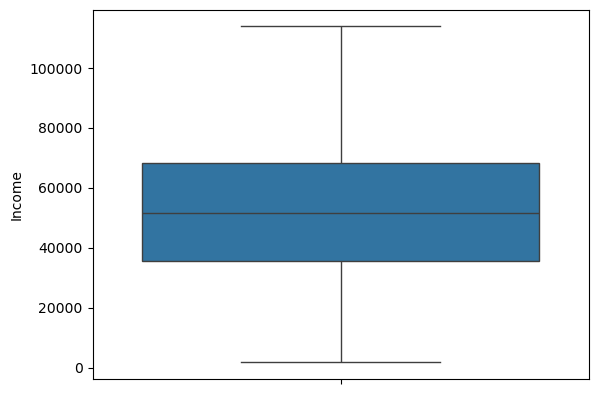

In [20]:
# 2 - Vou olhar a distribuição em um bloxplot para entender o porque isso esta acontecendo
# Temos uma distribuição aparentemente simétrica, nem o maior, nem o menor valor são outliers, estão perfeitamente estabelecidos no nosso conjunto de dados
# Assim, levanto a hipótese que a amplitude ser grande é somente por termos um perfil de clientes diversificado

sns.boxplot(df1['Income'])

/home/vitor/anaconda3/envs/data_path/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/vitor/anaconda3/envs/data_path/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 49.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/vitor/anaconda3/envs/data_path/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='kids', ylabel='Income'>

/home/vitor/anaconda3/envs/data_path/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/vitor/anaconda3/envs/data_path/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 57.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/vitor/anaconda3/envs/data_path/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


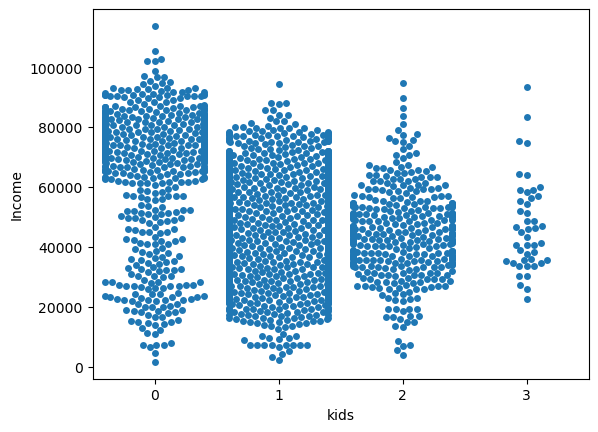

In [21]:
# Irei aproveitar para fazer uma comparação de salário das pessoas que tem filho e as que não tem.
plt.Figure(figsize=(5,5))

sns.swarmplot(x=df1['kids'], y=df1['Income'])

#### No gráfico swarmplot conseguimos ter uma ideia da distribuição de salário baseado na quantidade de filhos.
O Gráfico não apresenta discrepancia de salário em relação a quantidade de filhos.


In [22]:
# 3 Verificando faixa etária de idade dos clientes
df1['Age'].describe()

count    2021.000000
mean       51.117269
std        11.667616
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

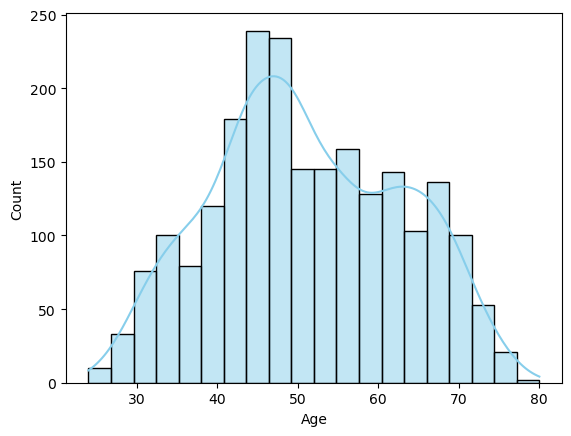

In [23]:
sns.histplot(df['Age'], kde=True, color='skyblue', bins=20)

In [24]:
# 4 - Nivel de graduação dos nosso clientes

df1['education_level'].value_counts()

education_level
Graduation    1015
PhD            439
Master         335
2n Cycle       183
Basic           49
Name: count, dtype: int64

Text(0, 0.5, 'Contagem')

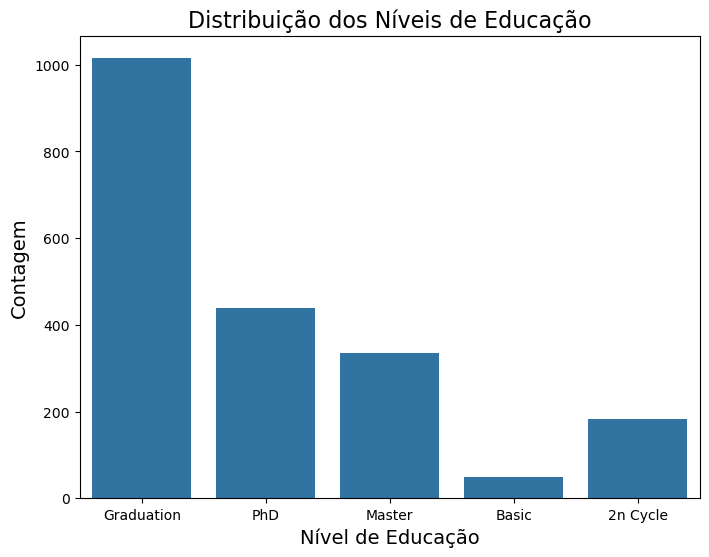

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='education_level', data=df1)

plt.title("Distribuição dos Níveis de Educação", fontsize=16)
plt.xlabel("Nível de Educação", fontsize=14)
plt.ylabel("Contagem", fontsize=14)

<Axes: xlabel='education_level', ylabel='Income'>

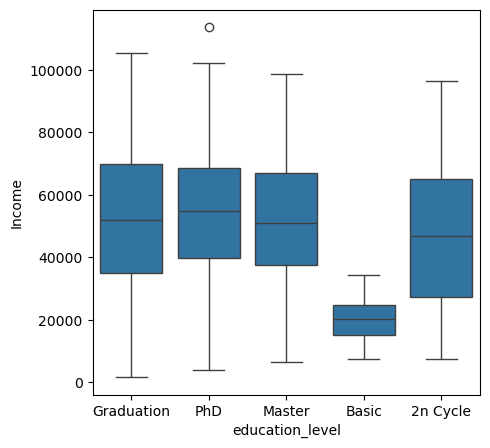

In [26]:
plt.figure(figsize=(5, 5))

sns.boxplot(
    x = df1['education_level'],
    y = df1['Income']
)

#### temos uma boa disperção dos dados, claramente temos mais pessoas que têm somente o nivel de graduação, porém no geral temos salários parecidos entre todos os niveis de graduação dos nossos cliente com exceção do nível básico, porém até o nivel básico apresenta overlap de boxplot, assim precisariamos de um teste de hipótese para verificar

In [27]:
# 5 - Estado civil dos nossos clientes
df1['marital_status'].value_counts()

marital_status
Married     785
Together    509
Single      443
Divorced    214
Widow        70
Name: count, dtype: int64

<Axes: xlabel='marital_status', ylabel='Income'>

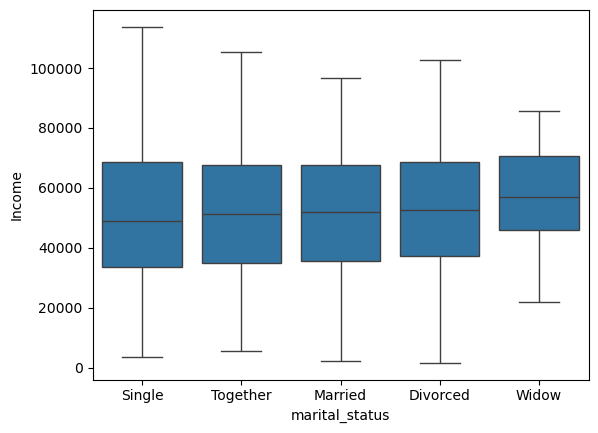

In [28]:
# O boxplot abaixo nos mostra que a media salarial dos nossos clientes é parecida independente do estado civil.

sns.boxplot(x=df1['marital_status'], y=df1['Income'])

In [29]:
# 6 Isso nos diz, que grande parte dos nossos clientes tem filho, representando quase 3/4 de todo o conjunto de dados.

df1['kids'].value_counts()

kids
1    1027
0     567
2     382
3      45
Name: count, dtype: int64

### Vamos coorelacionar algumas varivaveis para tentar achar padrões nos dados


# Distruibuição salarial

In [30]:
renda = df['Income'].describe()
renda

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

In [31]:
# Coeficiente de variacao
cv = (df1['Income'].std()/df1['Income'].mean())*100
cv



np.float64(40.07379553227723)

In [32]:
# Relação entre Estado civil e número de filho, será que pessoas em um relacionamento tem mais filhos do que pessoas solteiras? De começo parece que sim
# Mas vamos ver os dados na nossa base de dados

df1.groupby('marital_status')['kids'].sum()


marital_status
Divorced    219
Married     767
Single      381
Together    500
Widow        59
Name: kids, dtype: int64

Visivelemente as pessoas que estão ou já estiveram em um relacionamento, tem um número de filho maior do que as pessoas solteiras por si só.

### Podemos claramente observar que temos mais pessoas com filhos em nossa base de dados, sera que essas pessoas gastam mais do que as pessoas sem filhos?

In [33]:
df1.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
Index,,,,,,,,,,,,,,,,,,,,,
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,63,2822,1529,1441,0,Single,Graduation,0,1529
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,66,2272,21,15,0,Single,Graduation,2,21
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,55,2471,734,692,0,Together,Graduation,0,734
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,36,2298,48,43,0,Together,Graduation,1,48
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,39,2320,407,392,0,Married,PhD,1,407


In [34]:
df1['tem_filho'] = (df1['kids'] > 0).astype(int)


/tmp/ipykernel_5623/1640887467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tem_filho'] = (df1['kids'] > 0).astype(int)


In [35]:
df1.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses,tem_filho
Index,,,,,,,,,,,,,,,,,,,,,
0,58138.0,0,0,58,635,88,546,172,88,88,...,63,2822,1529,1441,0,Single,Graduation,0,1529,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,66,2272,21,15,0,Single,Graduation,2,21,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,55,2471,734,692,0,Together,Graduation,0,734,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,36,2298,48,43,0,Together,Graduation,1,48,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,39,2320,407,392,0,Married,PhD,1,407,1


In [36]:
df1.groupby('tem_filho')['expenses'].mean()


tem_filho
0    1056.282187
1     371.737276
Name: expenses, dtype: float64

In [37]:
df1.groupby('kids')['expenses'].mean()


kids
0    1056.282187
1     432.732230
2     223.267016
3     240.044444
Name: expenses, dtype: float64

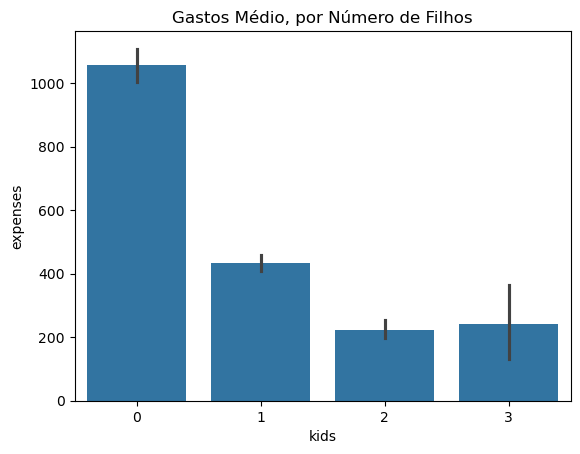

In [38]:
sns.barplot(data=df1, x='kids', y='expenses')
plt.title('Gastos Médio, por Número de Filhos')
plt.show()

#### Observamos que quanto menos filhos a pessoa tem, mais ela gasta na plataforma

### Vamos testar com as pessoas que ganham mais, será que pessoas que ganham mais, gastam mais na nossa plataforma?

In [39]:
df1.groupby('Income')['expenses'].mean()

Income
1730.0         7.0
2447.0      1729.0
3502.0         4.0
4023.0         8.0
4428.0        38.0
             ...  
101970.0     967.0
102160.0    1182.0
102692.0     964.0
105471.0    1517.0
113734.0     274.0
Name: expenses, Length: 1963, dtype: float64

# Vou discretizar os dados para conseguir analisar melhor

Divir em 4 valores

0 - 25000 = 1

25k - 50k = 2

50k - 75k = 3

75k - 114k = 4

In [40]:
valores = [0, 25000, 50000, 75000, 114000]
indices = [1,2,3,4]

In [41]:
df1['salario_por_faixa'] = pd.cut(df1['Income'], bins=valores, labels=indices, right=False )

/tmp/ipykernel_5623/1079065202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['salario_por_faixa'] = pd.cut(df1['Income'], bins=valores, labels=indices, right=False )


In [42]:
df1['salario_por_faixa'].value_counts()

salario_por_faixa
2    744
3    735
4    322
1    220
Name: count, dtype: int64

#### Já conseguimos obsevar que grande parte dos nossos clientes, quase 75% deles tem salários entre a faixa 2 e 3. Ou seja, entre 25 e 75 mil

In [43]:
df1.head(20)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses,tem_filho,salario_por_faixa
Index,,,,,,,,,,,,,,,,,,,,,
0,58138.0,0,0,58,635,88,546,172,88,88,...,2822,1529,1441,0,Single,Graduation,0,1529,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,...,2272,21,15,0,Single,Graduation,2,21,1,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,2471,734,692,0,Together,Graduation,0,734,0,3
3,26646.0,1,0,26,11,4,20,10,3,5,...,2298,48,43,0,Together,Graduation,1,48,1,2
4,58293.0,1,0,94,173,43,118,46,27,15,...,2320,407,392,0,Married,PhD,1,407,1,3
5,62513.0,0,1,16,520,42,98,0,42,14,...,2452,702,688,0,Together,Master,1,702,1,3
6,55635.0,0,1,34,235,65,164,50,49,27,...,2752,563,536,0,Divorced,Graduation,1,563,1,3
7,33454.0,1,0,32,76,10,56,3,1,23,...,2576,146,123,0,Married,PhD,1,146,1,2
8,30351.0,1,0,19,14,0,24,3,3,2,...,2547,44,42,0,Together,PhD,1,44,1,2


In [44]:
media_despesas = df1.groupby('salario_por_faixa')['expenses'].mean().reset_index()


/tmp/ipykernel_5623/3193994655.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_despesas = df1.groupby('salario_por_faixa')['expenses'].mean().reset_index()


In [45]:
df1.groupby('salario_por_faixa')['expenses'].mean().reset_index()

/tmp/ipykernel_5623/2478381274.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('salario_por_faixa')['expenses'].mean().reset_index()


,salario_por_faixa,expenses
0,1,54.240909
1,2,148.275538
2,3,782.542857
3,4,1372.667702


<Axes: xlabel='salario_por_faixa', ylabel='expenses'>

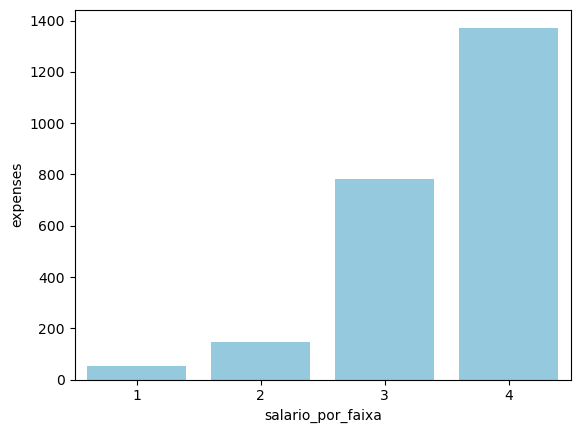

In [46]:
sns.barplot(data=media_despesas, x='salario_por_faixa', y='expenses', color='skyblue')

### Como podemos ver, quanto maior o salário maior o gasto dentro da plataforma.

# Consumo

In [47]:
coluna_de_gastos = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

In [48]:
df1[coluna_de_gastos].mean()

MntWines            306.492331
MntFruits            26.364671
MntMeatProducts     166.059871
MntFishProducts      37.603662
MntSweetProducts     27.268679
MntGoldProds         43.921821
dtype: float64

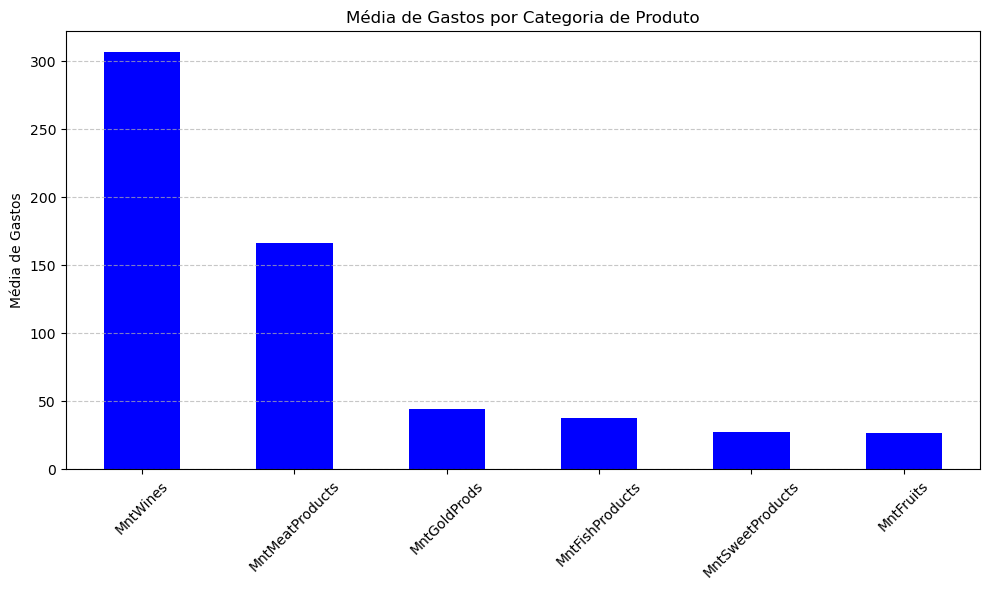

In [50]:

# Calcula a média de cada tipo de gasto
medias_gastos = df1[coluna_de_gastos].mean().sort_values(ascending=False)

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
medias_gastos.plot(kind='bar', color='blue')
plt.ylabel('Média de Gastos')
plt.title('Média de Gastos por Categoria de Produto')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Agora vou tentar otimizar o retorno das campanhas de marketing baseado no perfil do nossos clientes

Quais características estão associadas a uma maior taxa de aceitação das campanhas de marketing, e como podemos segmentar os clientes para campanhas mais eficientes?



In [53]:
df1.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital_status', 'education_level', 'kids',
       'expenses', 'tem_filho', 'salario_por_faixa'],
      dtype='object')

In [61]:
pd.set_option('display.max_columns', None)

In [62]:
df1.tail(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses,tem_filho,salario_por_faixa
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2198,26816.0,0,0,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0,34,2840,19,16,0,Single,Graduation,0,19,0,2
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,1094,847,0,Married,Graduation,1,1094,1,3
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1217,1193,1,Divorced,Graduation,0,1217,0,3
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,782,721,0,Together,Master,1,782,1,3
2204,52869.0,1,1,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1,66,2781,151,130,0,Married,PhD,2,151,1,3


In [56]:
pd.reset_option('display.max_columns')

In [57]:
# Vou verificar os clientes mais propensos a aceitar as campanhas de marketing, me baseando na coluna "acceptedCmpTotal", quais são os clientes que mais aceitam campanhas
df1['AcceptedCmpOverall'].value_counts()

AcceptedCmpOverall
0    1595
1     301
2      75
3      40
4      10
Name: count, dtype: int64

Claramente vemos que poucas campanhas de marketing foram aceitar no geral, tentarei me basear na ultima campanha

In [58]:
df1['Response'].value_counts()

Response
0    1710
1     311
Name: count, dtype: int64

temos que 311 pessoas aceitaram a ultima camapanha de marketing me basearei nessas pessoas para entender o padrão dos clientes que aceitam as campanha e melhorar esse resultado.

In [59]:
cliente_propensos = df1[df1['Response'] == 1]

In [60]:
cliente_propensos

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses,tem_filho,salario_por_faixa
Index,,,,,,,,,,,,,,,,,,,,,
0,58138.0,0,0,58,635,88,546,172,88,88,...,2822,1529,1441,0,Single,Graduation,0,1529,0,3
8,30351.0,1,0,19,14,0,24,3,3,2,...,2547,44,42,0,Together,PhD,1,44,1,2
14,82800.0,0,0,23,1006,22,115,59,68,45,...,2741,1270,1225,2,Single,PhD,0,1270,0,4
31,46610.0,0,2,8,96,12,96,33,22,43,...,2767,259,216,0,Divorced,PhD,2,259,1,2
37,48948.0,0,0,53,437,8,206,160,49,42,...,2672,860,818,1,Divorced,PhD,0,860,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,89616.0,0,0,36,671,47,655,145,111,15,...,2648,1629,1614,0,Single,Master,0,1629,0,4
2160,82347.0,0,0,38,556,54,845,202,133,63,...,2759,1790,1727,2,Married,2n Cycle,0,1790,0,4
2161,73803.0,0,1,61,833,80,363,52,26,174,...,2856,1354,1180,1,Married,Graduation,1,1354,1,3


Perfil desses clientes:

In [63]:
# Idade
cliente_propensos['Age'].describe()

count    311.000000
mean      50.401929
std       12.331543
min       24.000000
25%       41.000000
50%       49.000000
75%       60.500000
max       77.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

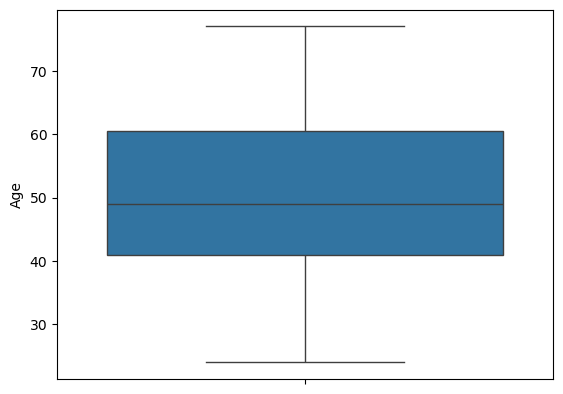

In [64]:
sns.boxplot(cliente_propensos['Age'])

In [65]:
cv = (cliente_propensos['Age'].std() / cliente_propensos['Age'].mean()) * 100

In [66]:
cv

np.float64(24.46641157782715)

Temos um coeficiente de variação razoavelmente alto. Porém, sem nenhum outlier na nossa base. A idade dos nossos cliente pode se entender em volta da mediana e ser representado pela media = 49

Ou podemos interpretar entre 41 e 60

In [67]:
cliente_propensos['marital_status'].value_counts()

marital_status
Single      103
Married      92
Together     55
Divorced     43
Widow        18
Name: count, dtype: int64

<Axes: xlabel='marital_status', ylabel='count'>

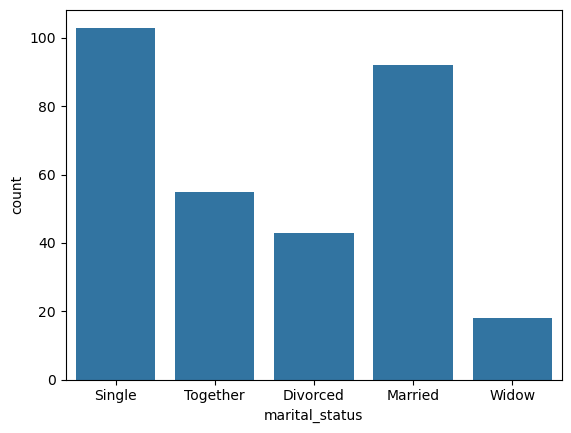

In [68]:
sns.countplot(x='marital_status', data=cliente_propensos)

Nossos clientes são em grande maioria Solteiros ou Casados

In [69]:
cliente_propensos['education_level'].value_counts()

education_level
Graduation    142
PhD            92
Master         53
2n Cycle       22
Basic           2
Name: count, dtype: int64

<Axes: xlabel='education_level', ylabel='count'>

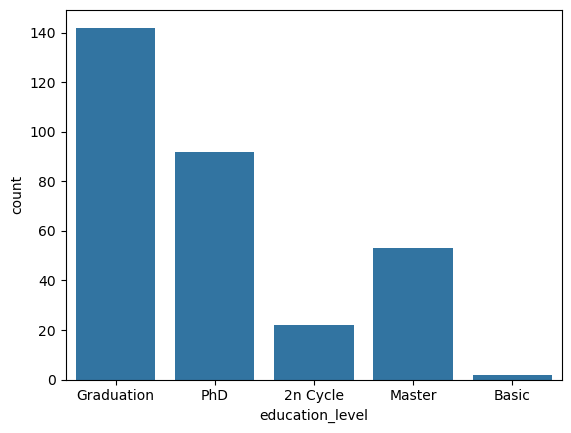

In [70]:
sns.countplot(x='education_level', data=cliente_propensos)

Os clientes que mais aceitam campanhas estão no ensino superior, em sua grande maioria, gradução e doutorado. Uma das formas de melhorarmos nossa campanha é focar no público que ja ingressaram no ensino superior.

## Vou analisar em qual faixa salarial predomina os clientes propensos

In [71]:
cliente_propensos['salario_por_faixa'].value_counts()

salario_por_faixa
4    109
3     89
2     88
1     25
Name: count, dtype: int64

<Axes: xlabel='salario_por_faixa', ylabel='count'>

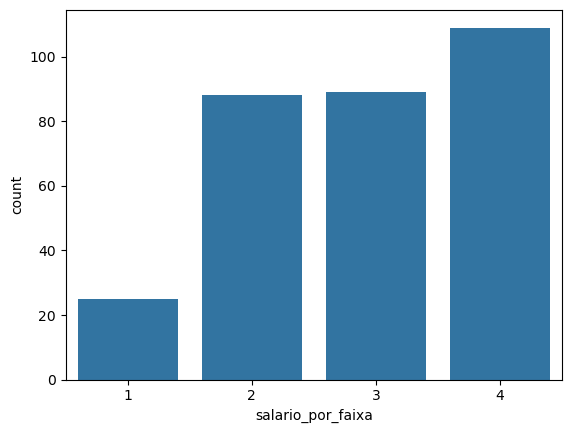

In [72]:
sns.countplot(x='salario_por_faixa', data=cliente_propensos)

conseguimos observar que os clientes propensons em um geral ganham acima de 25000 por ano, tendo predominância de clientes que ganham acima de 75000

### Vou buscar agora os produtos aos quais os clientes mais gastaram na nossa base de dados, tanto os produtos dos que aceitaram a campanha quanto dos que só compraram

In [73]:
coluna_de_gastos = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

df1.groupby('Response')[coluna_de_gastos].mean().T.sort_values(by=1, ascending=False)


Response,0,1
MntWines,272.361988,494.154341
MntMeatProducts,142.533918,295.414791
MntGoldProds,40.518713,62.633441
MntFishProducts,35.207602,50.778135
MntSweetProducts,25.198830,38.649518
MntFruits,24.200000,38.266881


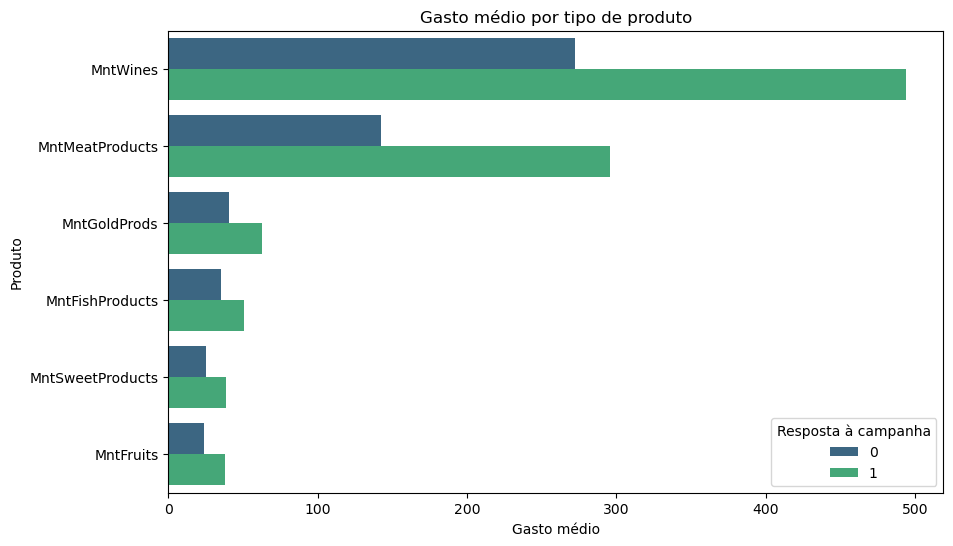

In [80]:
media_gastos = df1.groupby('Response')[coluna_de_gastos].mean().T.sort_values(by=1, ascending=False)
media_long = media_gastos.reset_index().melt(id_vars='index', var_name='Response', value_name='Gasto Médio')
media_long.rename(columns={'index': 'Produto'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=media_long, x='Gasto Médio', y='Produto', hue='Response', palette='viridis')
plt.title('Gasto médio por tipo de produto')
plt.xlabel('Gasto médio')
plt.ylabel('Produto')
plt.legend(title='Resposta à campanha')

Como podemos obsevar a media de valores, ambas pessoas, tanto as que aceitaram a campanha quanto as que recusaram, teem como maior gasto médio vinhos e carnes.

## Também irei verificar quais canais nossos clientes preferem.

In [74]:
pd.set_option('display.max_columns', None)


In [75]:
df1.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses,tem_filho,salario_por_faixa
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,1529,1441,0,Single,Graduation,0,1529,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,21,15,0,Single,Graduation,2,21,1,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,734,692,0,Together,Graduation,0,734,0,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,48,43,0,Together,Graduation,1,48,1,2
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,407,392,0,Married,PhD,1,407,1,3


In [76]:
pd.reset_option('display.max_columns')

In [77]:
canais = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases','NumWebVisitsMonth']

df1.groupby('Response')[canais].sum().T.sort_values(by=1, ascending=False)


Response,0,1
NumStorePurchases,9860,1877
NumWebVisitsMonth,9142,1651
NumWebPurchases,6745,1572
NumCatalogPurchases,4045,1300
NumDealsPurchases,3985,724


In [81]:
df1.groupby('tem_filho')['expenses'].sum()

tem_filho
0    598912
1    540506
Name: expenses, dtype: int64

In [82]:
cliente_propensos['tem_filho'].value_counts()

tem_filho
0    158
1    153
Name: count, dtype: int64